In [491]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from matplotlib.patches import Circle

In [492]:
#general Virgo v2 table
vf_full = Table.read(homedir+'/v2_snrcoadd.fits')
#general Virgo v2 env table
env_full = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')

vf = vf_full[vf_full['sgacut_flag']]
env = env_full[vf_full['sgacut_flag']]

In [493]:
#divide subsample into environments
vf_cluster = vf[env['cluster_member']]
vf_rg = vf[env['rich_group_memb']]   #only galaxies in rich groups --> not in filaments, etc.
vf_fil = vf[env['filament_member']]
vf_pg = vf[env['poor_group_memb']]
vf_field = vf[env['pure_field']]

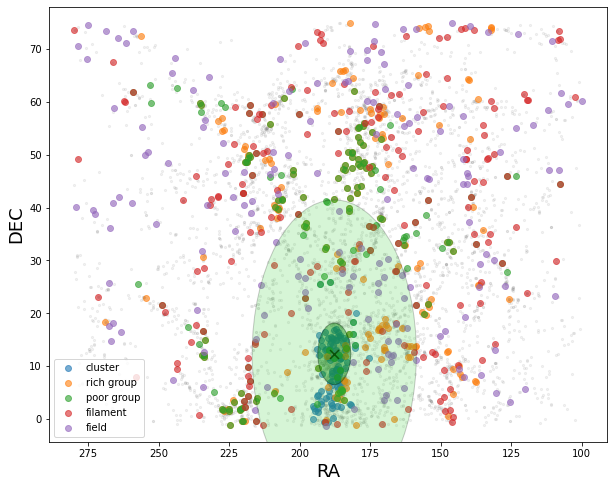

In [546]:
vf_env = [vf_cluster,vf_rg,vf_fil,vf_pg,vf_field]
vf_label = ['cluster','rich group','poor group','filament','field']
RA_center = 187.70
DEC_center = 12.34
virial_radius = 5.8224 #(degrees)
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(vf_full['RA_1'],vf_full['DEC_1'],s=5,alpha=0.1,color='gray')
plt.gca().invert_xaxis()
plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)
for i in range(0,len(vf_env)):
    plt.scatter(vf_env[i]['RA_1'],vf_env[i]['DEC_1'],label=vf_label[i],alpha=0.6)
ax.scatter([187.7],[12.34],color='black',marker='x',s=80)

circle_oneVR = plt.Circle((RA_center,DEC_center),virial_radius,facecolor='green',edgecolor='black',alpha=0.4)
ax.add_patch(circle_oneVR)
circle_fiveVR = plt.Circle((RA_center,DEC_center),virial_radius*5,facecolor='limegreen',edgecolor='black',alpha=0.2)
ax.add_patch(circle_fiveVR)

plt.ylim(np.min(vf_full['DEC_1'])-3,np.max(vf_full['DEC_1'])+3)
plt.legend()

plt.show()
#plt.savefig()

In [503]:
#above is a bit too clunky. perhaps a dummy example will do.

In [314]:
rg_flag = (env_full['rich_group_memb'])
rg_coord_flag = ((vf_full['RA']>210) & (vf_full['DEC']<5))
rg_flag_all = (rg_flag) & (rg_coord_flag)
vf_rgcoord = vf_full[rg_flag_all]

pg_flag = (env_full['poor_group_memb'])
pg_coord_flag = ((vf_full['RA']>185) & (vf_full['RA']<200) & (vf_full['DEC']>68))
pg_flag_all = (pg_flag) & (pg_coord_flag)
vf_pgcoord = vf_full[pg_flag_all]

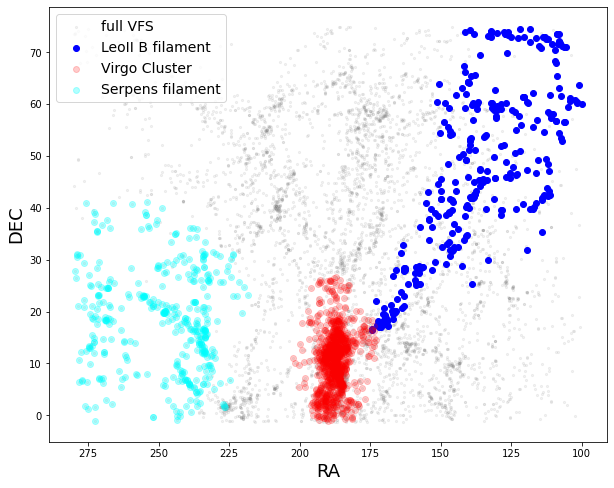

In [321]:
plt.figure(figsize=(10,8))
plt.scatter(vf_full['RA'],vf_full['DEC'],s=5,alpha=0.1,color='gray',label='full VFS')
plt.scatter(vf_full[(env_full['filament'] == 'LeoII_B')]['RA'],
            vf_full[(env_full['filament'] == 'LeoII_B')]['DEC'],
            color='blue',label='LeoII B filament')
plt.scatter(vf_full[(env_full['cluster_member'])]['RA'],vf_full[(env_full['cluster_member'])]['DEC'],alpha=0.2,
           label='Virgo Cluster',color='red')
#plt.scatter(vf_rgcoord['RA'],vf_rgcoord['DEC'],label='rich group',color='green')
#plt.scatter(vf_pgcoord['RA'],vf_pgcoord['DEC'],label='poor group',color='orange')
plt.scatter(vf_full[(env_full['filament'] == 'Serpens')]['RA'],
            vf_full[(env_full['filament'] == 'Serpens')]['DEC'],
            color='cyan',alpha=0.3,label='Serpens filament')
plt.gca().invert_xaxis()
plt.ylabel('DEC',fontsize=18)
plt.xlabel('RA',fontsize=18)
plt.legend(fontsize=14)

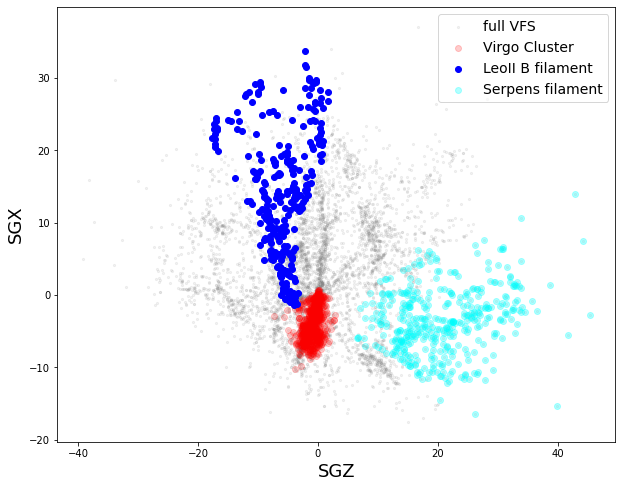

In [322]:
plt.figure(figsize=(10,8))
plt.scatter(env_full['SGZ'],env_full['SGX'],s=5,alpha=0.1,color='gray',label='full VFS')
plt.scatter(env_full[(env_full['cluster_member'])]['SGZ'],env_full[(env_full['cluster_member'])]['SGX'],alpha=0.2,
           label='Virgo Cluster',color='red')
plt.scatter(env_full['SGZ'][(env_full['filament'] == 'LeoII_B')],
            env_full['SGX'][(env_full['filament'] == 'LeoII_B')],color='blue',label='LeoII B filament')
#plt.scatter(env_full['SGZ'][rg_flag_all],env_full['SGX'][rg_flag_all],label='rich group',color='green')
#plt.scatter(env_full['SGZ'][pg_flag_all],env_full['SGX'][pg_flag_all],label='poor group',color='orange')
plt.scatter(env_full[(env_full['filament'] == 'Serpens')]['SGZ'],
            env_full[(env_full['filament'] == 'Serpens')]['SGX'],
            color='cyan',alpha=0.3,label='Serpens filament')

plt.ylabel('SGX',fontsize=18)
plt.xlabel('SGZ',fontsize=18)
plt.legend(fontsize=14,loc='upper right')

------------

In [1]:
#data analysis

USAGE:
    cat = catalogs(conv=False,MeanMedian='mean',MADmultiplier=5) --> initiate catalog class. 
        MeanMedian will propagate to all plots.
    cat.sfrmstar(savefig=False) --> generates SFR v. Mstar plot, color-coded according to available HI gas mass
    cat.envbins(savefig=False) --> plots number of subsample galaxies in each environment bin
    cat.env_means(trimOutliers=False, combine_mid=False, savefig=False) --> plots either mean 
        or median size ratio (w3/r) in each environment bin; trimOutliers will output an additional plot which compares
        my no PSF parameters to Rose's parameters, allowing the user to visualize which points are omitted in the 
        trimmed env_means plot; combine_mid is currently in development, but the aim is to merge the three middle
        environment values in order to, in part, help reduce error bars.
    cat.mass_hist(z0mgs_comp=True,savefig=False) --> generate mass histogram subplots per environment bin; 
        will compare

<Figure size 432x288 with 0 Axes>

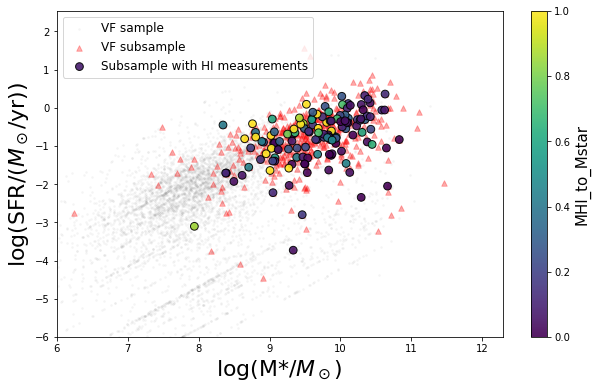

In [572]:
%run ~/github/research/data_analysis/re_analysis.py
cat = catalogs(conv=True,MeanMedian='median')
#cat.env_means(trimOutliers=True,savefig=False)

#cat.env_means(trimOutliers=False,savefig=False)
#cat.recreate_LCS_hist(keep_errs=True,savefig=False)
#cat.recreate_LCS_mass(keep_errs=False,savefig=True)
#cat.mass_hist(savefig=True)
#cat.envbins(savefig=True)
#cat.compareSGA(savefig=True)
cat.sfrmstar(savefig=True)
#cat.ratio_MS()

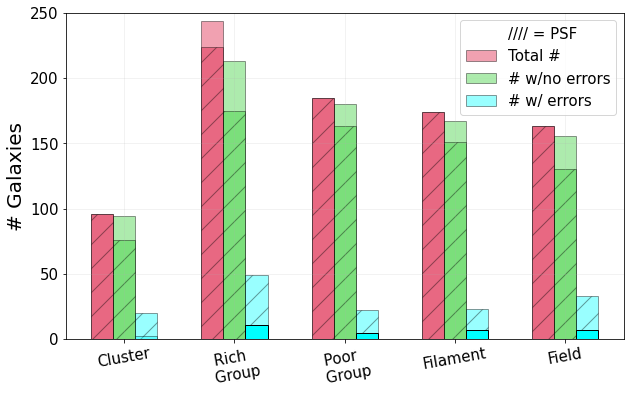

In [455]:
env_names = ['Cluster','Rich \n Group','Poor \n Group','Filament','Field']
index = np.arange(1,6,1)

total_nopsf = np.array([96,244,185,174,163])
n_noerr_nopsf = np.array([94,213,180,167,156])
n_err_nopsf = np.array([2,11,5,7,7])

total_psf = np.array([96,224,185,174,163])
n_noerr_psf = np.array([76,175,163,151,130])
n_err_psf = np.array([20,49,22,23,33])

labels = ['Total #', '# w/no errors', '# w/ errors']
bar_color = ['crimson','limegreen','cyan']
bar_color = ['crimson','limegreen','cyan']

plt.figure(figsize=(10,6))

plt.xticks(index, env_names, rotation=10, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid(alpha=0.2)
plt.ylabel(r'# Galaxies',fontsize=20)

for i in (index):
    if i==1:
        plt.bar(i-0.2,height=total_nopsf[i-1],width=0.2,color=bar_color[0],label=labels[0],alpha=0.4,edgecolor='black',zorder=1)
        plt.bar(i,height=n_noerr_nopsf[i-1],width=0.2,color=bar_color[1],label=labels[1],alpha=0.4,edgecolor='black',zorder=1)
        plt.bar(i+0.2,height=n_err_nopsf[i-1],width=0.2,color=bar_color[2],label=labels[2],alpha=0.4,edgecolor='black',zorder=2)
        
        plt.bar(i-0.2,height=total_psf[i-1],width=0.2,color=bar_color[0],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        plt.bar(i,height=n_noerr_psf[i-1],width=0.2,color=bar_color[1],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        plt.bar(i+0.2,height=n_err_psf[i-1],width=0.2,color=bar_color[2],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        
    else:
        plt.bar(i-0.2,height=total_nopsf[i-1],width=0.2,color=bar_color[0],alpha=0.4,edgecolor='black',zorder=1)
        plt.bar(i,height=n_noerr_nopsf[i-1],width=0.2,color=bar_color[1],alpha=0.4,edgecolor='black',zorder=1)
        plt.bar(i+0.2,height=n_err_nopsf[i-1],width=0.2,color=bar_color[2],alpha=1,edgecolor='black',zorder=2)
        
        plt.bar(i-0.2,height=total_psf[i-1],width=0.2,color=bar_color[0],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        plt.bar(i,height=n_noerr_psf[i-1],width=0.2,color=bar_color[1],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
        plt.bar(i+0.2,height=n_err_psf[i-1],width=0.2,color=bar_color[2],alpha=0.4,edgecolor='black',hatch='/',zorder=1)
plt.scatter(2,50,color='white',s=0.001,label='//// = PSF')
        
plt.legend(fontsize=15)
plt.ylim(0,250)

plt.savefig('/Users/k215c316/Desktop/comp.png',dpi=250)

In [191]:
#TROUBLE may instead be a consequence of the psf filename length...causes some sort of overflow/memory leak?

#nope. the problem was the PSF_oversampling parameter. I was claiming 8, which GALFIT treated as meaning that
#the psf pixscale was 1/8 that of the cutout. This wee trouble also accounts for why GALFIT ran for 702 galaxies
#in ~2 days (in series), as the program had to convolve, say, eight-times as much as when the pixscale=1.
#and the relative linear relation between the nopsf and psf data suggests that the interpreted pixscale 
#rendered the psf's effects...negligible? 
#I'm guessing the triviality of convolution declines as the psf's size declines.